In [14]:
import pandas as pd
import numpy as np
import missing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import janitor

In [15]:
riskfactors = pd.read_csv("./data/riskfactors.csv")
riskfactors.head(2)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190.0,64.0,32.68,Married,NaN,0,6.0,...,No,NaN,NaN,NaN,1095.0,261.0,104.0,156.0,521.0,12.0
1,40,Female,48,170.0,68.0,25.90,Divorced,NaN,0,5.0,...,No,NaN,NaN,NaN,52.0,209.0,52.0,0.0,52.0,0.0


## Eliminación de valores faltantes

In [3]:
(
    riskfactors.shape
)

(245, 34)

### *Pairwise deletion* (Eliminación por pares)

In [5]:
(
    riskfactors
    ["weight_lbs"]
    .mean()
)

174.26808510638298

In [7]:
riskfactors["weight_lbs"].size, riskfactors["weight_lbs"].count()

(245, 235)

In [9]:
riskfactors.mean(skipna=False, numeric_only=True)

state              29.946939
age                58.106122
weight_lbs               NaN
height_inch              NaN
bmi                      NaN
children            0.424490
education                NaN
employment          4.020408
veteran                  NaN
health_physical     4.118367
health_mental       3.142857
health_poor              NaN
drink_days               NaN
drink_average            NaN
smoke_last               NaN
diet_fruit               NaN
diet_salad               NaN
diet_potato              NaN
diet_carrot              NaN
diet_vegetable           NaN
diet_juice               NaN
dtype: float64

### *Listwise Deletion or Complete Case* (Eliminación por lista o caso completo)

In [11]:
(
    riskfactors
    .dropna(
        subset=["weight_lbs"],
        how= 'any'
    )
    .shape
)

(235, 34)

Con base en 2 o más columnas

In [12]:
(
    riskfactors
    .dropna(
        subset=["weight_lbs", 'height_inch'],
        how= 'any'
    )
    .shape
)

(234, 34)

In [13]:
(
    riskfactors
    .dropna(
        subset=["weight_lbs", 'height_inch'],
        how= 'all'
    )
    .shape
)

(244, 34)

### Representación gráfica tras la eliminación de los valores faltantes

<Axes: >

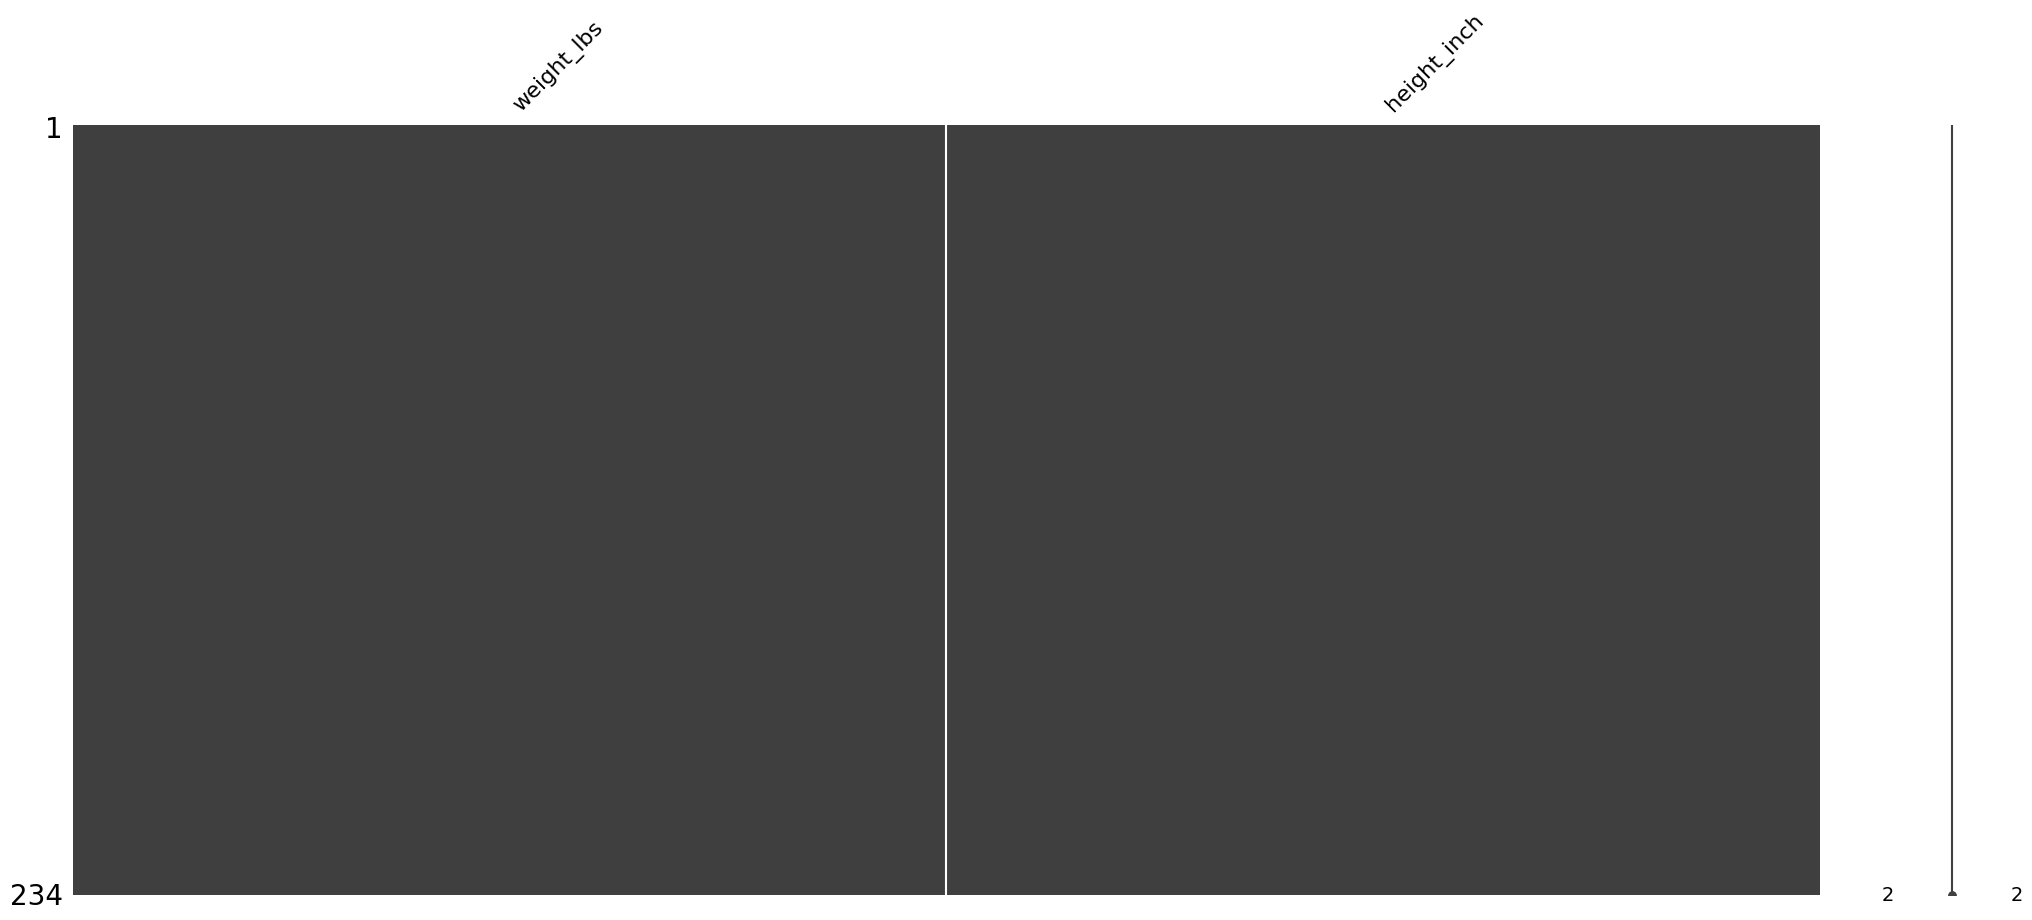

In [18]:
(
    riskfactors
    .dropna(
        subset=["weight_lbs", 'height_inch'],
        how= 'any'
    )
    .select(['weight_lbs', 'height_inch'])
    .pipe(
        missingno.matrix
    )
)

<Axes: >

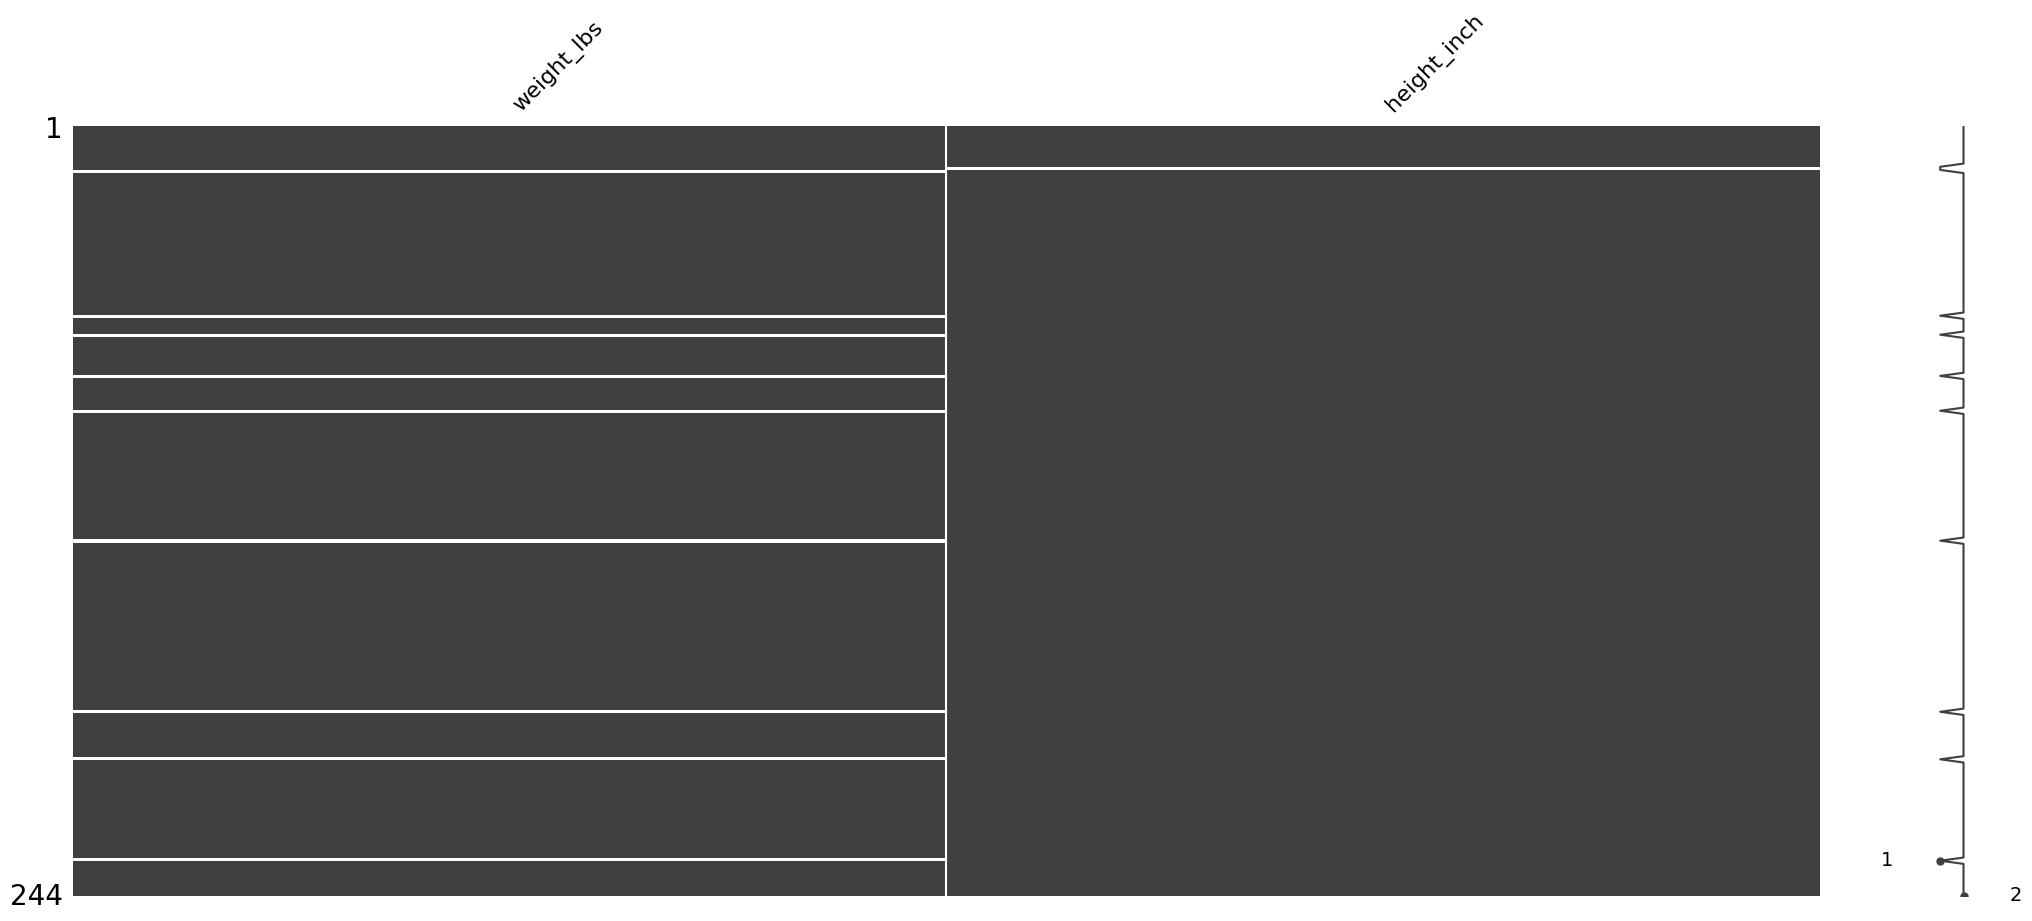

In [19]:
(
    riskfactors
    .dropna(
        subset=["weight_lbs", 'height_inch'],
        how= 'all'
    )
    .select(['weight_lbs', 'height_inch'])
    .pipe(
        missingno.matrix
    )
)